In [35]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


In [36]:
data = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [37]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [38]:
data.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

we can see above that the mean of the order_amount is 3145.12 which is the mentioned AOV calculated in the question. While calculting AOV we also need to take the total number of orders into account. The correct way to calculate AOV is 
AOV = Total revenue / Total number of orders

In [39]:
df = data.groupby(['shop_id'])['order_amount','total_items'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [40]:
df['ARPU'] = df['order_amount'] / df['total_items'] #This stores the ARPU for each shopid

In [41]:
display(df)

,order_amount,total_items,ARPU
shop_id,,,
1,13588,86,158.0
2,9588,102,94.0
3,14652,99,148.0
4,13184,103,128.0
5,13064,92,142.0
...,...,...,...
96,16830,110,153.0
97,15552,96,162.0
98,14231,107,133.0


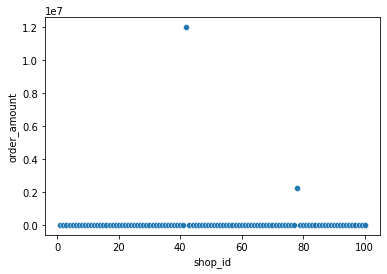

In [42]:
ax = sns.scatterplot(x = df.index, y = df.order_amount)

There are 2 really significant outliers. Its would cleary effect further analysis if ignored. Since the question mentions affordable shoes i will remove the shop ids with the significantly large revenues

In [43]:
z_score = np.abs(stats.zscore(df))

We are caluclating the z-score for the table and dropping every any row that has a z-score above 3

In [44]:
z_score

array([[0.11872229, 0.10456475, 0.09824166],
       [0.12202774, 0.0998301 , 0.12339253],
       [0.11784304, 0.10071784, 0.10217148],
       [0.11905614, 0.09953418, 0.11003113],
       [0.1191553 , 0.10278925, 0.10452938],
       [0.11125279, 0.0942077 , 0.08684517],
       [0.11986267, 0.09775869, 0.11631885],
       [0.1207882 , 0.10515658, 0.1084592 ],
       [0.11854214, 0.09539136, 0.11396096],
       [0.115397  , 0.09479953, 0.10217148],
       [0.11550608, 0.10190151, 0.08802412],
       [0.1145037 , 0.10249334, 0.08134342],
       [0.11196925, 0.08976897, 0.0974557 ],
       [0.11835208, 0.0942077 , 0.11474692],
       [0.11667539, 0.09894235, 0.10020657],
       [0.12079811, 0.10900348, 0.09902763],
       [0.11540692, 0.10042193, 0.09116798],
       [0.11551269, 0.09687094, 0.09902763],
       [0.11297906, 0.09272812, 0.09627675],
       [0.11914125, 0.09953418, 0.11042411],
       [0.11821655, 0.10042193, 0.10452938],
       [0.1190925 , 0.10338108, 0.10295745],
       [0.

In [45]:
df = df[(z_score < 3).all(axis=1)]

In [46]:
df = pd.concat([df,data['shop_id'].value_counts() ], axis = 1)

In [47]:
df.columns = ['Total_revenue', 'Total_items', 'ARPU', 'Total_no_of_orders']
df.index.names = ['shop_id']

In [48]:
df['AOV']  = df.Total_revenue/df.Total_no_of_orders #AOV for each shop id

In [49]:
display(df)

,Total_revenue,Total_items,ARPU,Total_no_of_orders,AOV
shop_id,,,,,
1,13588.0,86.0,158.0,44,308.818182
2,9588.0,102.0,94.0,55,174.327273
3,14652.0,99.0,148.0,48,305.250000
4,13184.0,103.0,128.0,51,258.509804
5,13064.0,92.0,142.0,45,290.311111
...,...,...,...,...,...
96,16830.0,110.0,153.0,51,330.000000
97,15552.0,96.0,162.0,48,324.000000
98,14231.0,107.0,133.0,58,245.362069


In [50]:
print('Mean AOV:', df.AOV.mean())
print('Mean ARPU for all shops:', df.ARPU.mean())

Mean AOV: 299.68239912615485
Mean ARPU for all shops: 150.22448979591837


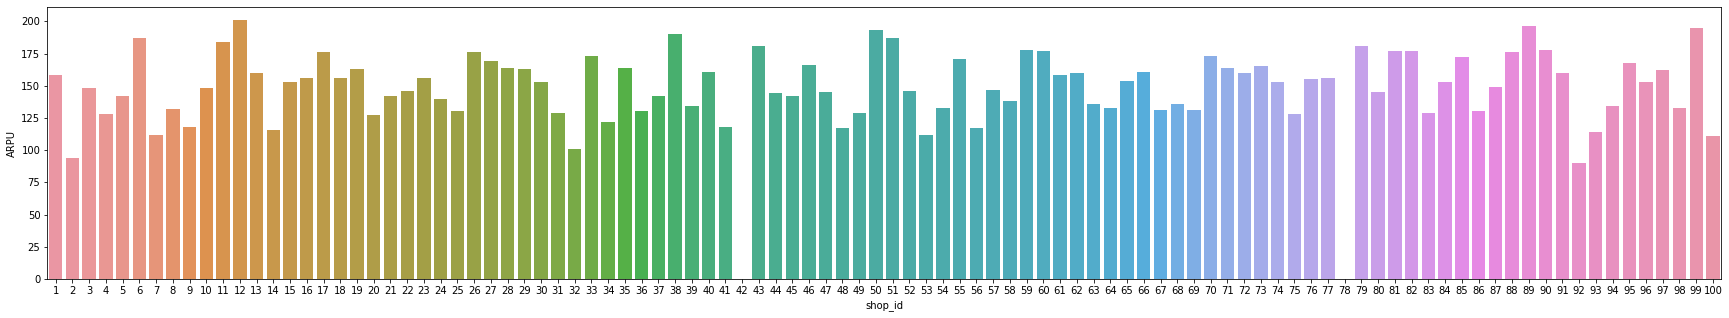

In [51]:
plt.figure(figsize=(30,5))
ax = sns.barplot(x = df.index, y = df.ARPU)

plt.show()